In [54]:


import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")



import os



### Reading Dataset

In [55]:
df = pd.read_csv('Housing.csv')

In [56]:
df.sample(5) # Display randomly 5 rows from data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
267,4403000,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished
35,8080940,7000,3,2,4,yes,no,no,no,yes,2,no,furnished
326,3990000,4100,4,1,1,no,no,yes,no,no,0,no,unfurnished
215,4830000,4160,3,1,3,yes,no,no,no,no,0,no,unfurnished
378,3640000,2275,3,1,3,yes,no,no,yes,yes,0,yes,semi-furnished


In [57]:
df.shape # To get number of rows and column in data

(545, 13)

In [58]:
df.info() # Display the info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [59]:
df.isna().sum() # To check missing value

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### No missing value found

In [60]:
df.duplicated().sum() # To check duplicated rows

0

#### No duplicated rows found

In [61]:
df.describe() # display statistical values for numerical columns

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [62]:
df.describe(include='object') # To see stats for categorical column

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


### For hotwaterheating it is highly imbalanced having 520 no out of 545

## Univariate Analysis

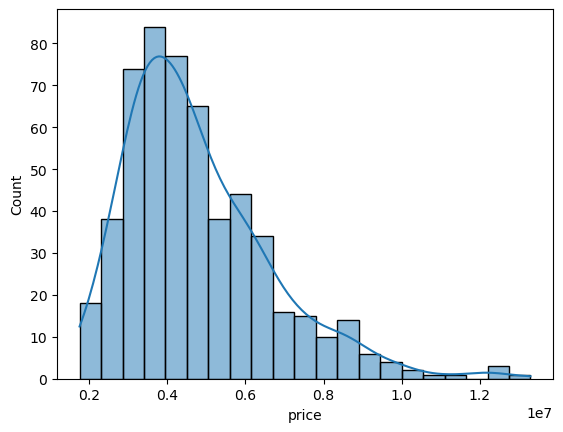

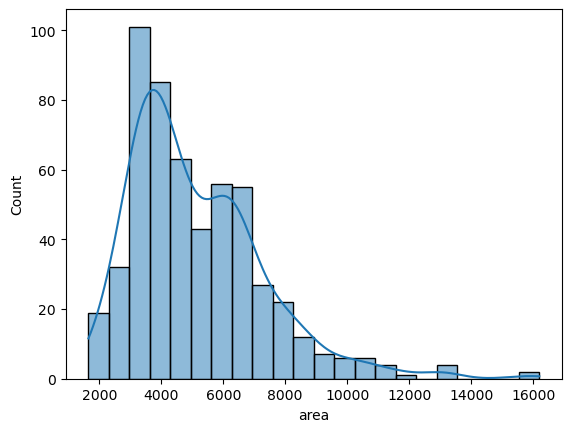

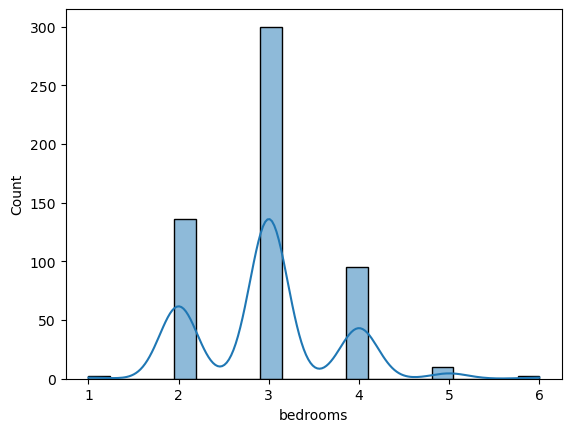

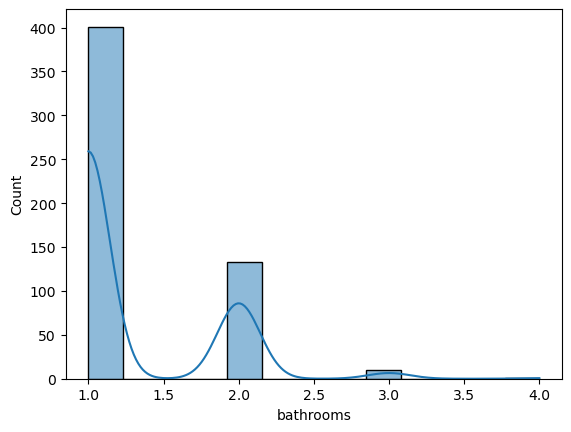

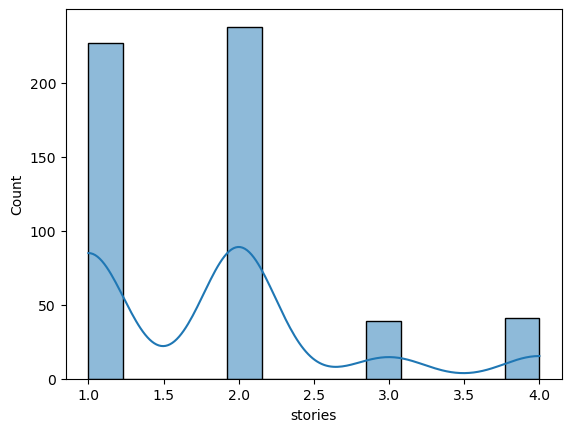

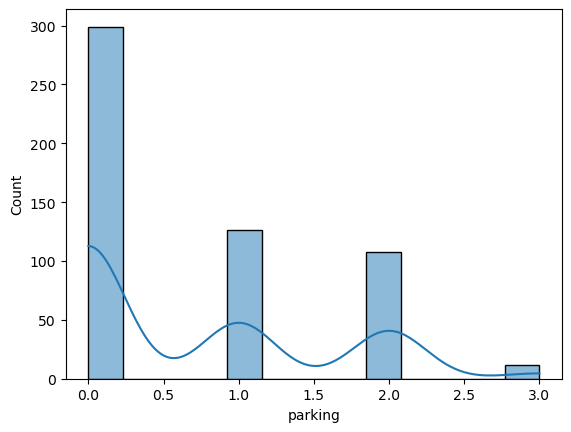

In [63]:
# Plot histogram for all numerical columns
for i in df.select_dtypes(include='number').columns:
    sns.histplot(df[i],kde=True)
    plt.show()

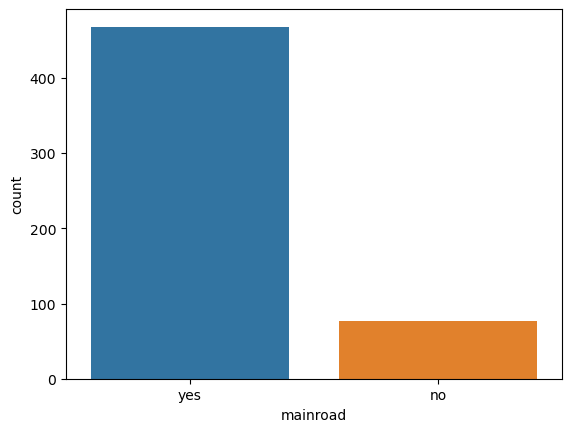

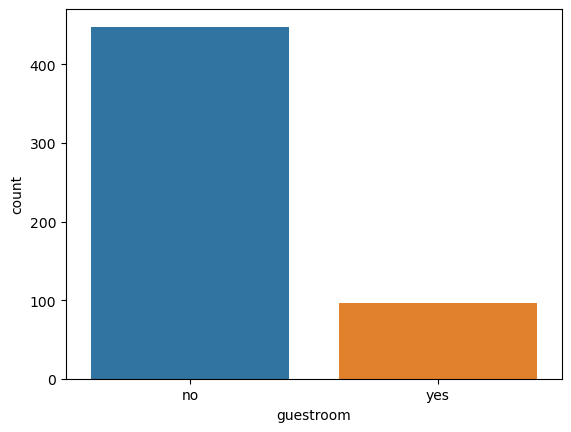

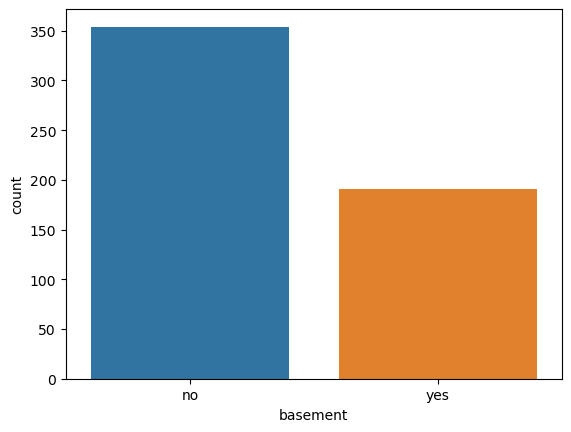

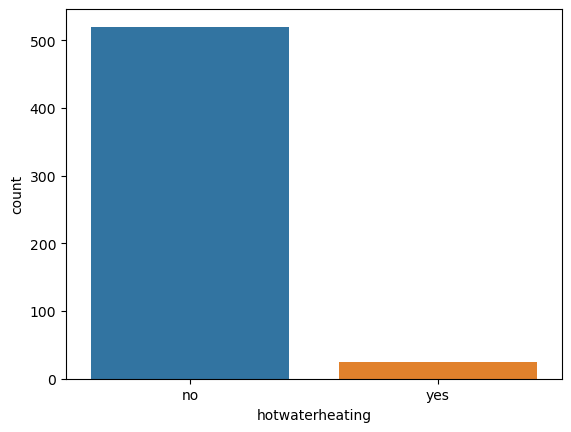

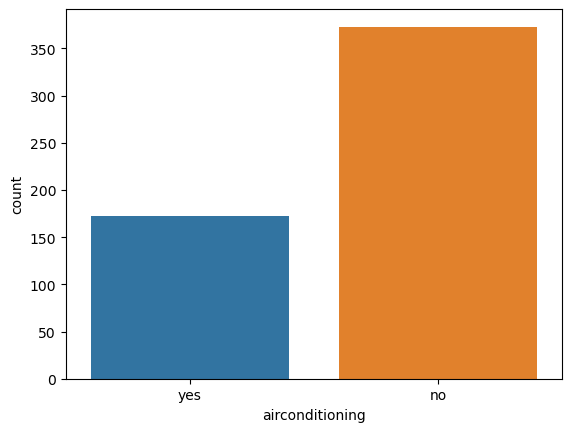

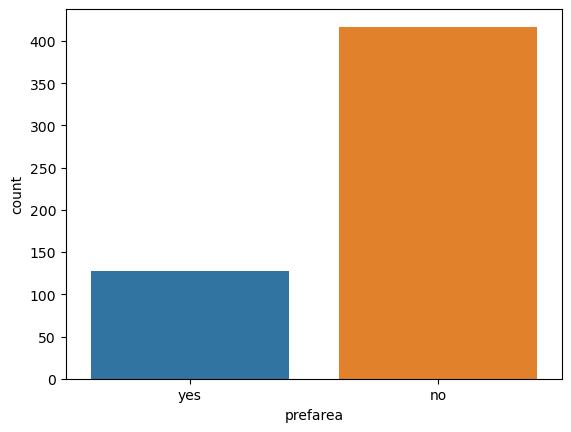

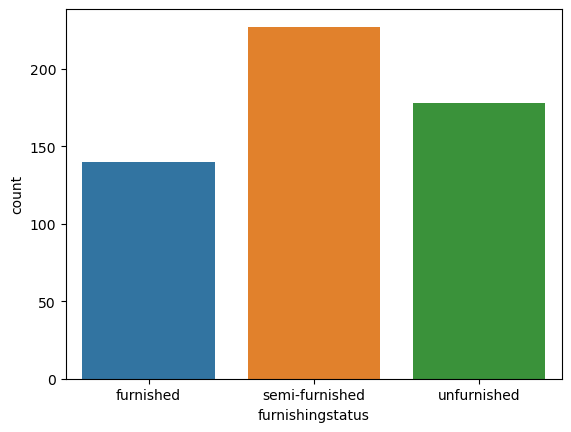

In [64]:
# Plotting countplot for all categorical columns
for i in df.select_dtypes(include='object').columns:
    sns.countplot(df,x=i)
    plt.show()

In [65]:
# Calculating Correlation of Price with numerical columns
for i in df.select_dtypes(include='number').columns:
    print(i,df[i].corr(df['price']))

price 1.0
area 0.5359973457780797
bedrooms 0.36649402577386875
bathrooms 0.5175453394550112
stories 0.42071236618861657
parking 0.38439364863572595


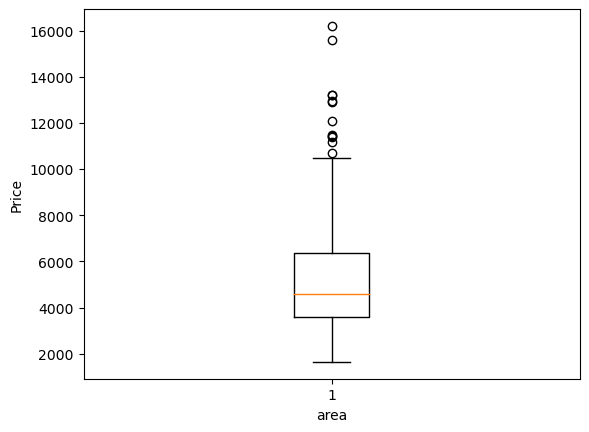

In [66]:
# Plot Boxplot to check for outlier
plt.boxplot(df['area'])
plt.xlabel('area')
plt.ylabel("Price")
plt.show()

#### area has few outlier which need to be handled

### Bivariate Analysis

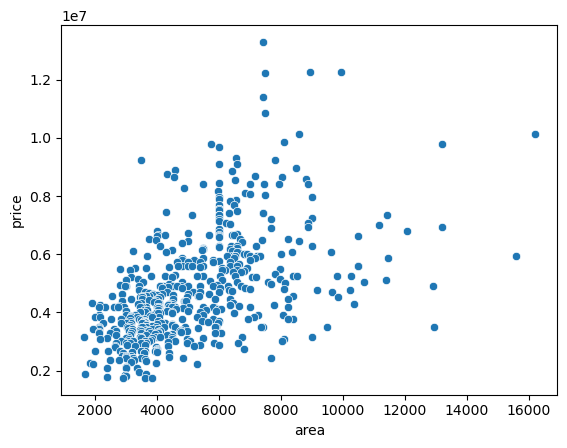

In [67]:
sns.scatterplot(data=df,x='area',y='price')
plt.show()

#### area have linear relation with price

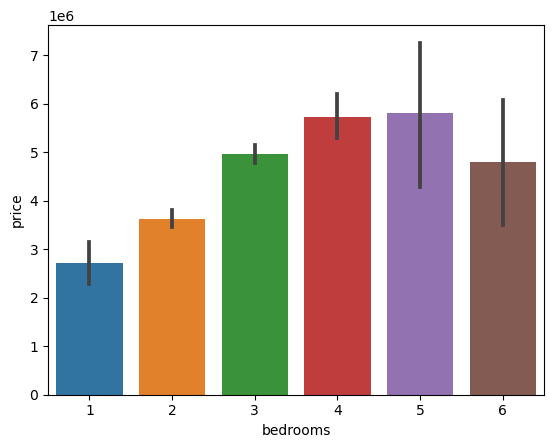

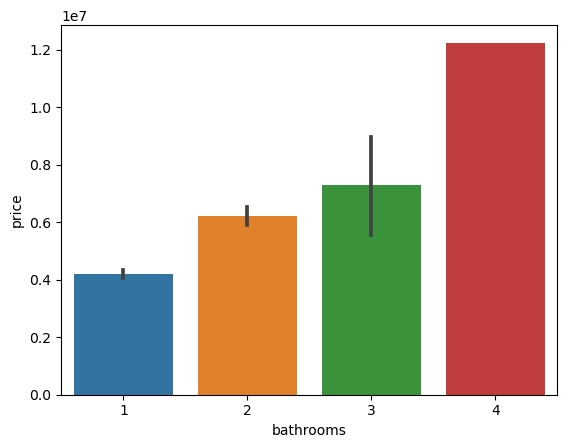

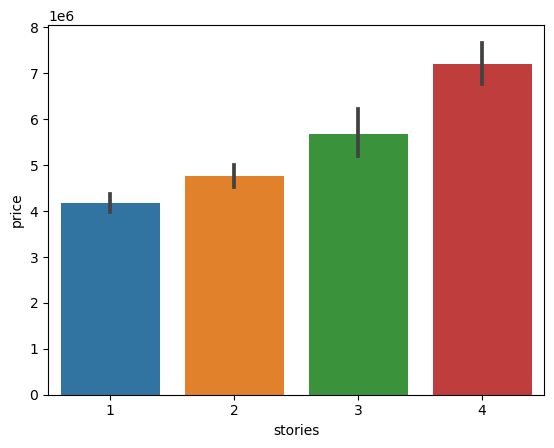

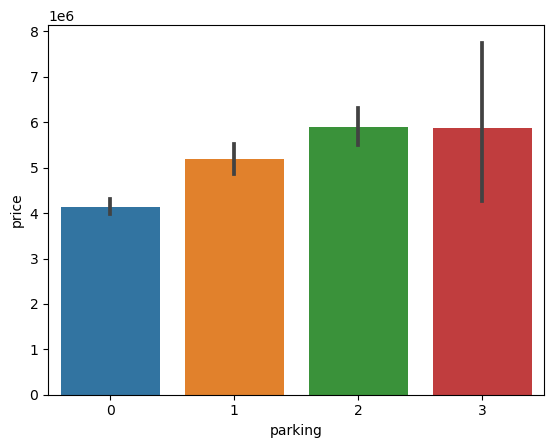

In [68]:
for i in ['bedrooms', 'bathrooms', 'stories', 'parking']:
    sns.barplot(data=df,x=i,y='price')
    plt.show()

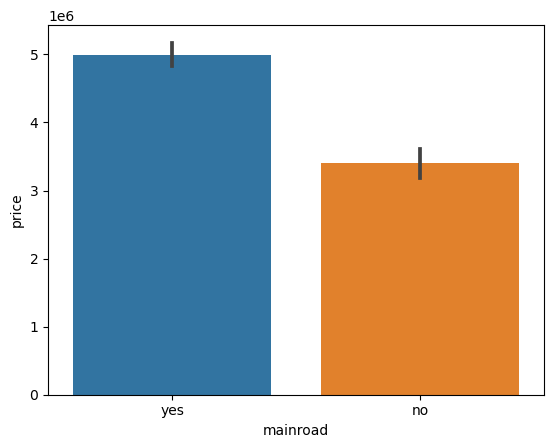

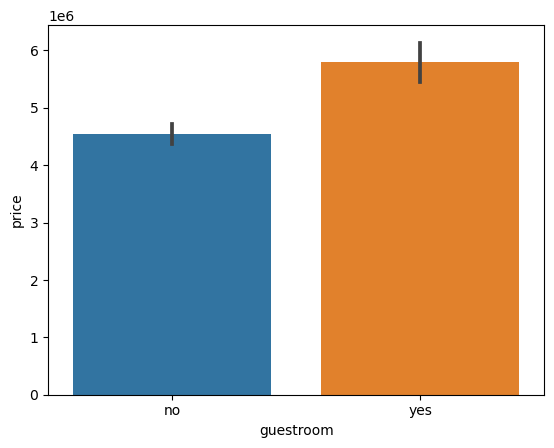

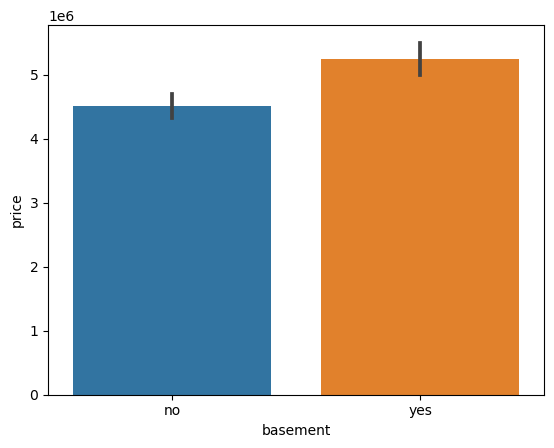

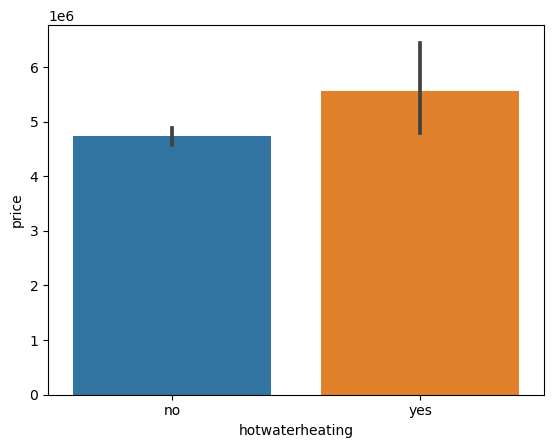

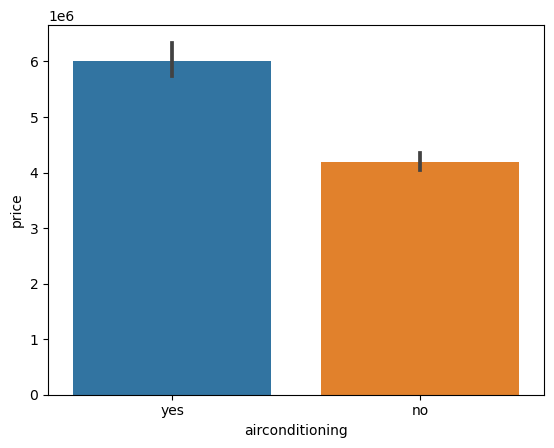

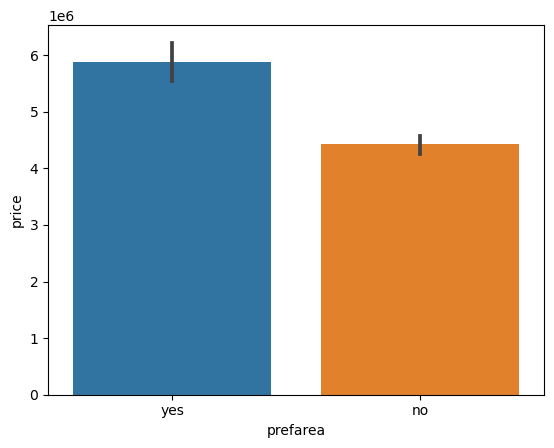

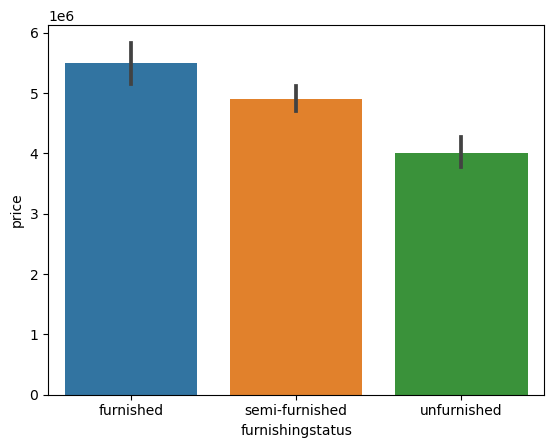

In [69]:
# Ploting barplot for categorical columns with price
for i in df.select_dtypes(include='object').columns:
    sns.barplot(data=df,x=i,y='price')
    plt.show()

In [70]:
for i in df.select_dtypes(include='object').columns:
    print(df.groupby(i)['price'].median())

mainroad
no     3290000.0
yes    4550000.0
Name: price, dtype: float64
guestroom
no     4165000.0
yes    5495000.0
Name: price, dtype: float64
basement
no     4077500.0
yes    4900000.0
Name: price, dtype: float64
hotwaterheating
no     4329500.0
yes    5383000.0
Name: price, dtype: float64
airconditioning
no     3885000.0
yes    5757500.0
Name: price, dtype: float64
prefarea
no     4095000.0
yes    5582500.0
Name: price, dtype: float64
furnishingstatus
furnished         5075000.0
semi-furnished    4585000.0
unfurnished       3430000.0
Name: price, dtype: float64


#### hotwaterheating is highly imbalanced and median value has big difference around 10 lakh need to make sure that model get enough data for both class to train so will use stratified sampling to keep proportion same

In [71]:
# Mapping yes with 1 and no with 0 

for i in ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']:
    df[i] = df[i].map({'yes':1,'no':0})

In [72]:
#Doing Stratified sampling on hotwaterheating

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(df, df['hotwaterheating']):
    train_data = df.iloc[train_idx]
    test_data  = df.iloc[test_idx]


In [73]:
x_train = train_data.drop(['price'],axis=1)
x_test = test_data.drop(['price'],axis=1)
y_train = train_data['price']
y_test = test_data['price']

In [74]:
# Capping outlier in the areacolumns
Q1 = x_train['area'].quantile(0.25)
Q3 = x_train['area'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
x_train['area'] = np.where(x_train['area']>upper,upper,np.where(x_train['area']<lower,lower,x_train['area']))
x_test['area'] = np.where(x_test['area']>upper,upper,np.where(x_test['area']<lower,lower,x_test['area']))

In [75]:
# Ordinal Encoding in furnishingstatus 

from sklearn.preprocessing import OrdinalEncoder

Oe = OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
x_train['furnishingstatus'] = Oe.fit_transform(x_train[['furnishingstatus']])
x_test['furnishingstatus'] = Oe.transform(x_test[['furnishingstatus']])

In [76]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)           
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2) 
    r2 = 1.2 - (ss_res / ss_tot) #Custom value
    return r2

In [77]:
# Fit Linear Regression 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error,mean_absolute_error

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# Calculation Training RMSE

y_train_pred = model.predict(x_train)
rmse_train = mean_squared_error(y_train_pred,y_train,squared=False)
print('Training rmse :',rmse_train)

# Calculate R2, MAE and RMSE score for test data

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred,squared=False))

#Compute cross-validation scores using negative RMSE 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x_train, y_train,scoring='neg_root_mean_squared_error',cv=10)
rmse_score = -scores

def display_scored(scores):
    print('cross_val_score :',scores)
    print('mean of cross val score :',scores.mean())
    print('standard deviation :',scores.std())

display_scored(rmse_score)

Training rmse : 1079243.822091386
R2: 0.902629901092584
MAE: 730846.9802995507
RMSE: 993618.5078248535
cross_val_score : [1138890.11161583  979693.58427189 1178716.27091245 1232540.20764416
 1184447.51895654 1236782.04484591  989631.45506787 1053040.37329466
 1042655.3440199  1178537.79727901]
mean of cross val score : 1121493.4707908225
standard deviation : 92094.11935677183


In [78]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Fit Lasso Regression
lasso = Lasso(alpha=0.1, random_state=345)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

# Training RMSE
y_train_pred_lasso = lasso.predict(x_train)
rmse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso, squared=False)
print("Lasso Training RMSE:", rmse_train_lasso)

# Test Metrics
print("Lasso R2:", r2_score(y_test, y_pred_lasso))
print("Lasso MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))

# Cross-validation RMSE
scores = cross_val_score(lasso, x_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
rmse_score_lasso = -scores
display_scored(rmse_score_lasso)


Lasso Training RMSE: 1079243.8220916279
Lasso R2: 0.902629902343252
Lasso MAE: 730846.8800939473
Lasso RMSE: 993618.5057353916
cross_val_score : [1138890.09865827  979693.44798057 1178716.21686052 1232540.26204712
 1184447.70608723 1236781.85207126  989631.9858906  1053040.47256306
 1042654.94593626 1178537.86697169]
mean of cross val score : 1121493.4855066598
standard deviation : 92094.08697065528


In [79]:
from sklearn.linear_model import Ridge

# Fit Ridge Regression
ridge = Ridge(alpha=1.0, random_state=345)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

# Training RMSE
y_train_pred_ridge = ridge.predict(x_train)
rmse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
print("Ridge Training RMSE:", rmse_train_ridge)

# Test Metrics
print("Ridge R2:", r2_score(y_test, y_pred_ridge))
print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))

# Cross-validation RMSE
scores = cross_val_score(ridge, x_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
rmse_score_ridge = -scores
display_scored(rmse_score_ridge)


Ridge Training RMSE: 1079305.542431429
Ridge R2: 0.9026388511454442
Ridge MAE: 729546.1459006991
Ridge RMSE: 993603.555068818
cross_val_score : [1138030.88264017  976059.71097778 1178560.14799862 1232776.74506189
 1183891.74057432 1233983.69401975  993534.53577963 1054743.64067342
 1034091.87913044 1180171.77311863]
mean of cross val score : 1120584.4749974639
standard deviation : 92474.63391835897


In [80]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=345
)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# Training RMSE
y_train_pred_rf = rf.predict(x_train)
rmse_train_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
print("RF Training RMSE:", rmse_train_rf)

# Test Metrics
print("RF R2:", r2_score(y_test, y_pred_rf))
print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RF RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

# Cross-validation RMSE
scores = cross_val_score(rf, x_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
rmse_score_rf = -scores
display_scored(rmse_score_rf)


RF Training RMSE: 428617.6664099567
RF R2: 0.8476010080939371
RF MAE: 747320.945412844
RF RMSE: 1081653.9794675962
cross_val_score : [1112748.65213729 1140415.80238223 1135554.63722426 1184480.10248452
 1229921.1188887  1285116.69164382 1111754.40507738  999986.7835499
  879035.20217295 1475637.67818055]
mean of cross val score : 1155465.107374161
standard deviation : 151871.9220615433


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Base model
rf = RandomForestRegressor(random_state=345)

# Grid Search
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit Grid Search
grid_search_rf.fit(x_train, y_train)

# Best model
best_rf = grid_search_rf.best_estimator_
print("Best Parameters:", grid_search_rf.best_params_)

# Predictions
y_pred_rf_grid = best_rf.predict(x_test)

# Training RMSE
y_train_pred_rf_grid = best_rf.predict(x_train)
rmse_train_rf_grid = mean_squared_error(y_train, y_train_pred_rf_grid, squared=False)
print("Training RMSE:", rmse_train_rf_grid)

# Test Metrics
print("R2:", r2_score(y_test, y_pred_rf_grid))
print("MAE:", mean_absolute_error(y_test, y_pred_rf_grid))
print("RMSE:", mean_squared_error(y_test, y_pred_rf_grid, squared=False))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training RMSE: 461954.8733247842
R2: 0.8453906032416443
MAE: 746465.3067895488
RMSE: 1085040.986500501


In [82]:
import pickle

with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as linear_regression_model.pkl")

Model saved as linear_regression_model.pkl
